This Project is about building a model to predict the rating of apps in google play store. The dataset was gotten from Kaggle (https://www.kaggle.com/datasets/lava18/google-play-store-apps). This was a group project under the Women Techsters Fellowship powered by Tech4Dev.
Contributors:
- Ibukunoluwa Abraham
- Goodness Nwokebu 
- Faith Lucky
- Esther-Inioluwa Mustapha
- Favour Atane

## Importing Necessary Libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#Read in the file
pd.set_option('display.max_columns',80) 
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Description


In [3]:
# data was copied to maintain original to make reference when needed
data = df 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape

(10841, 13)

In [5]:
#checking the amount of null values
data.isnull().sum()



App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [6]:
data.dropna(inplace = True)

The data read has 10841 columns and 13 rows. four columns with numerical values were imputed as string as they contained some sort of symbol. The data set displayed contains info about rating of a variety of apps. 
Rating is most often depicted using the symbol-star, that most times come in a 5 scale rank. A pop up to rate the app is displayed on a consumer's device immediately after the use of that app. The consumer is then given the option to either rate immediately or later. Sometimes, after rating, the consumer is redirected to another window to complete the process by providing a bit more details.


## Data Cleaning

In [7]:
def dollar(Price):
    """
    This function takes removes the dollar sign from any price given,
    returning just the number
    
    """
    if '$' in Price:
        x = Price[1:]
        return float(x)
    else:
        x = Price
        return float(x)
    
    
data.Price = data.Price.map(dollar)

In [8]:
#converting reviews to numerical values
data.Reviews = pd.to_numeric(data.Reviews)

In [9]:
#dropping the columns that seems irrelevant(current version and Android version and last updated)
data.drop(['Last Updated', 'Current Ver', 'Android Ver','App'], axis = 1, inplace = True)


In [10]:
#size unit were not the same. Some were stored in kb, while some were stored in Mb
def clean_size(size):
    """
    This function can convert Kb to Mb
    
    """
    if 'k' in size:
        x = round((float(size[:-1]) / 1024),2) #1024 kb makes one mb 
        return x
    elif 'M' in size:
        x = round((float(size[:-1]) ),2)
        return x
    elif '+' in size:
        x = round((float(size[:-1]) / 1024),2)
        return x
    else:
        return None
   



In [11]:
data.Size = data.Size.map(clean_size)
#after cleaning, the data now have missing values.

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Size'>

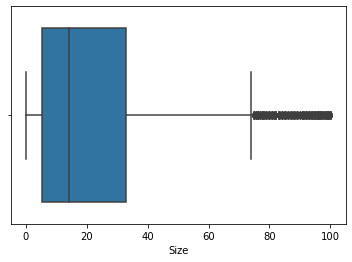

In [12]:
#To display presence of outliers
sns.boxplot(data['Size'])

In [13]:
# Filling the NaN values with the median. Median was chosen due to the presence of outliers.
data.Size.fillna(data.Size.median(), inplace = True)
data.Size.info()

<class 'pandas.core.series.Series'>
Int64Index: 9360 entries, 0 to 10840
Series name: Size
Non-Null Count  Dtype  
--------------  -----  
9360 non-null   float64
dtypes: float64(1)
memory usage: 146.2 KB


In [14]:
#Cleaning Installs
data['Installs'] = data['Installs'].apply(lambda x: x.strip('+'))
data['Installs'] = [int(i.replace(',', '')) for i  in data['Installs']]


##### Supervised Machine Learning learns froms a numeric data, from the findings obtained above a lot of cleaning is required. Therefore the below will be carried out on the following:

1) Missing data : 'Rating' had highest number of missing values in the dataset. The aim of this project is to predict 'Rating' so filling the rating with either mean or median will lead to a bias model. So the best option will be to drop the missing data.


2) From the information in Table 2, 'App' has a high cardinality, with most apps being identified with a unique name. As a result 'App' was dropped considering that it would not help our model. Also removed were 'current_ver', 'Andriod_ver' and 'Last_updated'.

3) Installs, size, Price and reviews were just duly modified such that they could be easy to handle.



In [15]:
data.info()#checking for the changes in our data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        9360 non-null   object 
 1   Rating          9360 non-null   float64
 2   Reviews         9360 non-null   int64  
 3   Size            9360 non-null   float64
 4   Installs        9360 non-null   int64  
 5   Type            9360 non-null   object 
 6   Price           9360 non-null   float64
 7   Content Rating  9360 non-null   object 
 8   Genres          9360 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 731.2+ KB


# Data Visualization
**Finding the relationship between data**



In [16]:
data.describe(include = 'all')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
count,9360,9360.000000,9.360000e+03,9360.000000,9.360000e+03,9360,9360.000000,9360,9360
unique,33,NaN,NaN,NaN,NaN,2,NaN,6,115
top,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools
freq,1746,NaN,NaN,NaN,NaN,8715,NaN,7414,732
mean,NaN,4.191838,5.143767e+05,21.401314,1.790875e+07,NaN,0.961279,NaN,NaN
std,NaN,0.515263,3.145023e+06,21.571469,9.126637e+07,NaN,15.821640,NaN,NaN
min,NaN,1.000000,1.000000e+00,0.010000,1.000000e+00,NaN,0.000000,NaN,NaN
25%,NaN,4.000000,1.867500e+02,6.600000,1.000000e+04,NaN,0.000000,NaN,NaN
50%,NaN,4.300000,5.955000e+03,14.000000,5.000000e+05,NaN,0.000000,NaN,NaN
75%,NaN,4.500000,8.162750e+04,27.000000,5.000000e+06,NaN,0.000000,NaN,NaN


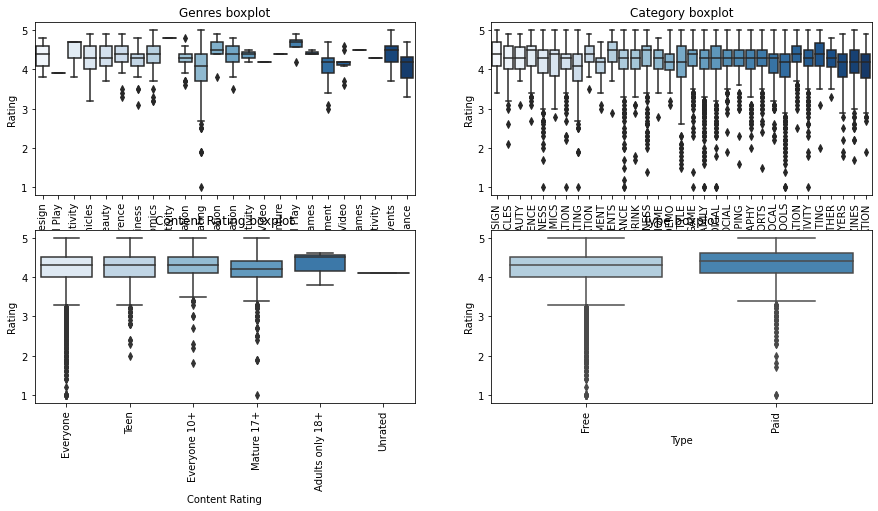

In [17]:
plt.figure(figsize = (15,7))

plt.subplot(2,2,1)
plt.title('Genres boxplot')
sns.boxplot(x = (data['Genres'][0:1000]), y = data['Rating'], palette = 'Blues' )
plt.xticks(rotation = 90);

plt.subplot(2,2,2)
plt.title('Category boxplot')
sns.boxplot(x = 'Category', y = 'Rating', data = data, palette = 'Blues');
plt.xticks(rotation = 90);


plt.subplot(2,2,3)
plt.title('Content Rating boxplot')
sns.boxplot(x = data['Content Rating'], y = data['Rating'], palette = 'Blues')
plt.xticks(rotation = 90);


plt.subplot(2,2,4)
plt.title('Type boxplot')
sns.boxplot(x = data['Type'], y = data['Rating'], palette = 'Blues')
plt.xticks(rotation = 90);


Text(0, 0.5, 'Size')

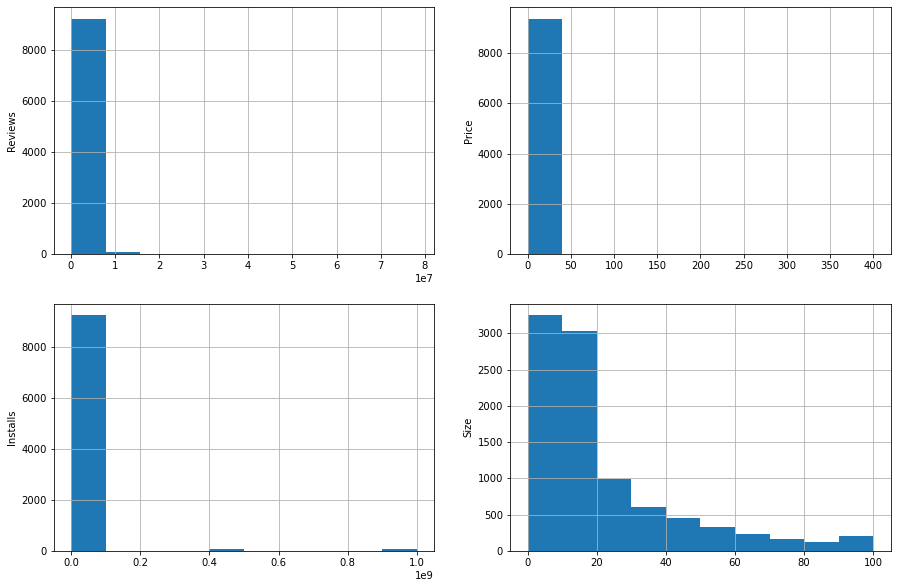

In [18]:
#set figure size
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
fig = data.Reviews.hist()
fig.set_ylabel('Reviews')

plt.subplot(2,2,2)
fig = data.Price.hist()
fig.set_ylabel('Price')


plt.subplot(2,2,3)
fig = data.Installs.hist()
fig.set_ylabel('Installs')

plt.subplot(2,2,4)
fig = data.Size.hist()
fig.set_ylabel('Size')

<AxesSubplot:>

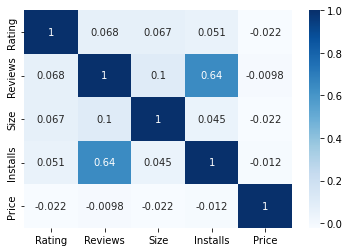

In [19]:
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

None of the variables are exactly correlated to each other. Their different correlation to Rating is less than 0.01 which is poor for a linear regression

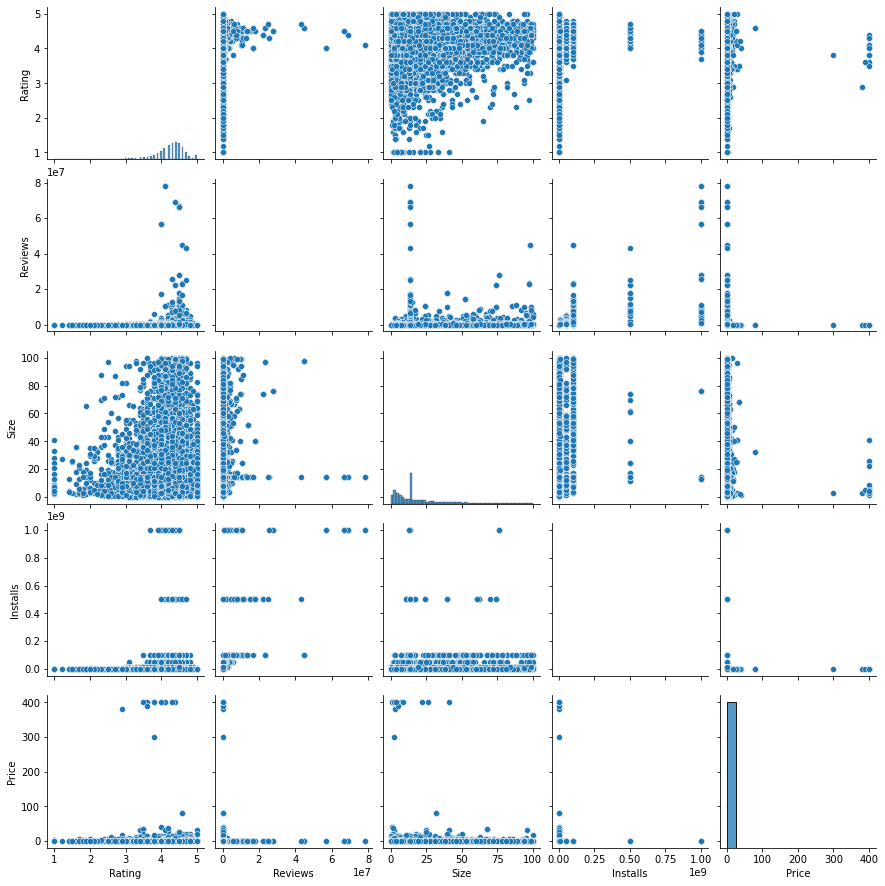

In [20]:
sns.pairplot(data)

<AxesSubplot:xlabel='Price', ylabel='Rating'>

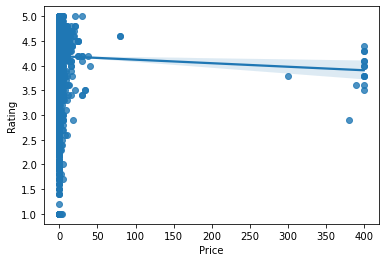

In [21]:
sns.regplot(x = 'Price', y = 'Rating', data = data)

Insights:
- **Boxplot:** This plot usually shows distributions of our data. Perfect for detecting outliers. It was used for just categorical data and from the plots above, there were a lot of **outliers** in the data.  

- **Histplot:** Another amazing plot used to find distributions of data. I used this to find how skewed my numerical data was.

- **Heatmap**: The Pearson's correlation of the numerical data was shown clearly using heatmap and we can see that Rating had very little linear correlation with other features. It is also negatively correlated to Size which makes sense. It is insteresting to note that Reviews and Installs have good correlation.
- **Pairplot:** One of my best plots, this plots everything agaainst everything.

# Data Preprocessing

### - Categorical Encoding
  There are two types of categorical data: Nominal and Ordinal Data. Depending on the type, there are various kind of encoding you can use. For nominal data, Label Encoding is can be used while for Ordinal Data, One-Hot Encoding can be used.
### - Data Standardization  

In [22]:
#here we use one hot encoding encoding
cat_dummy = pd.get_dummies(data.Category,drop_first=True)
cat_dummy

,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10836,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10837,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10839,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#processing Type column
data.Type.unique()
Type_dummy = pd.get_dummies(data.Type, drop_first = True)

data['Content Rating'].unique()
CR_dummy = pd.get_dummies(data['Content Rating'], drop_first = True)

data.Genres.unique()
Genres_dummy = pd.get_dummies(data.Genres, drop_first = True)


In [24]:
from sklearn.preprocessing import MinMaxScaler


In [25]:
Scaler = MinMaxScaler()
data['Installs1']= Scaler.fit_transform(data[['Installs']])
data['Reviews1']= Scaler.fit_transform(data[['Reviews']])
data['Size1'] = Scaler.fit_transform(data[['Size']])
data['Price1'] = Scaler.fit_transform(data[['Price']])

In [26]:
#adding the encoodings
data.drop(['Category','Type','Genres','Content Rating'], axis = 1, inplace = True)


In [29]:
all_data = pd.concat([(data.drop(['Installs','Price','Size','Reviews'], axis = 1)),
                      Type_dummy,cat_dummy,CR_dummy], axis = 1)
all_data

,Rating,Installs1,Reviews1,Size1,Price1,Paid,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,4.1,9.999000e-06,2.021538e-06,0.189919,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,3.9,4.999990e-04,1.235953e-05,0.139914,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.7,4.999999e-03,1.119638e-03,0.086909,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,5.000000e-02,2.759054e-03,0.249925,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,4.3,9.999900e-05,1.235953e-05,0.027903,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.0,4.990000e-07,7.676727e-08,0.025903,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10836,4.5,4.999000e-06,4.733982e-07,0.529953,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10837,5.0,9.900000e-08,3.838364e-08,0.035904,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10839,4.5,9.990000e-07,1.445784e-06,0.139914,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
all_data.isnull().sum()

Rating                 0
Installs1              0
Reviews1               0
Size1                  0
Price1                 0
Paid                   0
AUTO_AND_VEHICLES      0
BEAUTY                 0
BOOKS_AND_REFERENCE    0
BUSINESS               0
COMICS                 0
COMMUNICATION          0
DATING                 0
EDUCATION              0
ENTERTAINMENT          0
EVENTS                 0
FAMILY                 0
FINANCE                0
FOOD_AND_DRINK         0
GAME                   0
HEALTH_AND_FITNESS     0
HOUSE_AND_HOME         0
LIBRARIES_AND_DEMO     0
LIFESTYLE              0
MAPS_AND_NAVIGATION    0
MEDICAL                0
NEWS_AND_MAGAZINES     0
PARENTING              0
PERSONALIZATION        0
PHOTOGRAPHY            0
PRODUCTIVITY           0
SHOPPING               0
SOCIAL                 0
SPORTS                 0
TOOLS                  0
TRAVEL_AND_LOCAL       0
VIDEO_PLAYERS          0
WEATHER                0
Everyone               0
Everyone 10+           0


## Machine Learning


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [32]:
lr = LinearRegression()

In [33]:
y = all_data[['Rating']]
X = all_data.drop('Rating',axis = 1)
X 

,Installs1,Reviews1,Size1,Price1,Paid,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS,COMICS,COMMUNICATION,DATING,EDUCATION,ENTERTAINMENT,EVENTS,FAMILY,FINANCE,FOOD_AND_DRINK,GAME,HEALTH_AND_FITNESS,HOUSE_AND_HOME,LIBRARIES_AND_DEMO,LIFESTYLE,MAPS_AND_NAVIGATION,MEDICAL,NEWS_AND_MAGAZINES,PARENTING,PERSONALIZATION,PHOTOGRAPHY,PRODUCTIVITY,SHOPPING,SOCIAL,SPORTS,TOOLS,TRAVEL_AND_LOCAL,VIDEO_PLAYERS,WEATHER,Everyone,Everyone 10+,Mature 17+,Teen,Unrated
0,9.999000e-06,2.021538e-06,0.189919,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,4.999990e-04,1.235953e-05,0.139914,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,4.999999e-03,1.119638e-03,0.086909,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,5.000000e-02,2.759054e-03,0.249925,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,9.999900e-05,1.235953e-05,0.027903,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,4.990000e-07,7.676727e-08,0.025903,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10836,4.999000e-06,4.733982e-07,0.529953,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10837,9.900000e-08,3.838364e-08,0.035904,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
10839,9.990000e-07,1.445784e-06,0.139914,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size =  0.3, random_state = 43)

In [35]:
lr.fit(X_train, y_train)

LinearRegression()

In [58]:
prediction = lr.predict(X_test)
train_prediction= lr.predict(X_train) 
error = mse(y_test, prediction)
r2_train_error = r2_score(y_train,train_prediction)
r2_error = r2_score(y_test, prediction)
print(f'The mean_square_error for the linear regression model  test data is {error}')
print(f'The r2_error for the linear regression model  test data is {r2_error}')
print(f'The r2_error for the linear regression model train data is {r2_train_error}')


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Actual values')

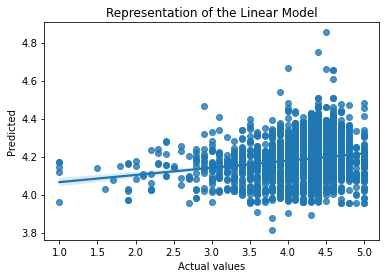

In [39]:
sns.regplot(y_test, prediction)
plt.title('Representation of the Linear Model')
plt.ylabel('Predicted')
plt.xlabel('Actual values')


Not a very good Model.

In [40]:
from sklearn.ensemble import RandomForestRegressor


In [41]:
model2 = RandomForestRegressor()

In [42]:
model2.fit(X_train,y_train)

C:\Users\User\AppData\Local\Temp\ipykernel_5672\1259910858.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(X_train,y_train)


RandomForestRegressor()

In [49]:
prediction2 = model2.predict(X_test)
train_prediction = model2.predict(X_train)

In [51]:
error = round(mse(y_test, prediction2),3)
r2_error = r2_score(y_test, prediction2)
r2_train_error = r2_score(y_train,train_prediction)
print(f'The mean_square_error for the random forest regression model test data is {error}')
print(f'The r2_error for the random forest regression model test data is {r2_error}')
print(f'The r2_error for the random forest regression model train data is {r2_train_error}')




The mean_square_error for the random forest regression model test data is 0.23
The r2_error for the random forest regression model test data is 0.08744089925821785
The r2_error for the random forest regression model train data is 0.8645800446982496


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Actual values')

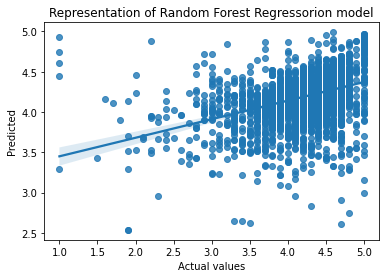

In [52]:
sns.regplot(y_test, prediction2)
plt.title('Representation of Random Forest Regression model')
plt.ylabel('Predicted')
plt.xlabel('Actual values')

This is a better model than Linear Regression model

In [60]:
from sklearn import svm

In [61]:
model3 = svm.SVR()
model3.fit(X_train,y_train)

prediction3 = model3.predict(X_test)
train_prediction = model3.predict(X_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
mse(y_test, prediction3)
error = mse(y_test, prediction)
r2_train_error = r2_score(y_train,train_prediction)
r2_error = r2_score(y_test, prediction3)
print(f'The mean_square_error for the linear regression model  test data is {error}')
print(f'The r2_error for the svm model  test data is {r2_error}')
print(f'The r2_error for the svm model train data is {r2_train_error}')

The mean_square_error for the linear regression model  test data is 0.24461812843342295
The r2_error for the svm model  test data is -0.0020596150672544944
The r2_error for the svm model train data is 0.02635195483941155


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Actual values')

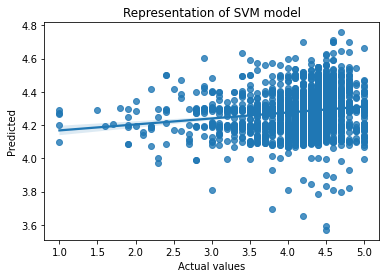

In [63]:
sns.regplot(y_test, prediction3)
plt.title('Representation of SVM model')
plt.ylabel('Predicted')
plt.xlabel('Actual values')

In [64]:
from sklearn import neighbors
for k in range(0,100,5):
    K = k+1
    model4 = neighbors.KNeighborsRegressor(n_neighbors = K)

    model4.fit(X_train, y_train)
    prediction4 = model4.predict(X_test)
    error = mse(y_test,  prediction4)
    error2 = r2_score(y_test,  prediction4)
    print('Mean Square error for K = ',K,'is:', error)



Mean Square error for K =  1 is: 0.43047364672364674
Mean Square error for K =  6 is: 0.275954514878126
Mean Square error for K =  11 is: 0.25504038049492594
Mean Square error for K =  16 is: 0.24752033809650997
Mean Square error for K =  21 is: 0.2453441576060624
Mean Square error for K =  26 is: 0.24346024250240225
Mean Square error for K =  31 is: 0.2442073820598795
Mean Square error for K =  36 is: 0.24512351724350184
Mean Square error for K =  41 is: 0.24562707086576807
Mean Square error for K =  46 is: 0.24539128179546424
Mean Square error for K =  51 is: 0.24596757383474033
Mean Square error for K =  56 is: 0.24661188286746322
Mean Square error for K =  61 is: 0.24658411277028586
Mean Square error for K =  66 is: 0.2470142191796232
Mean Square error for K =  71 is: 0.24626476496715538
Mean Square error for K =  76 is: 0.24600261927239941
Mean Square error for K =  81 is: 0.24566095042318178
Mean Square error for K =  86 is: 0.24554956893230961
Mean Square error for K =  91 is: 0

In [66]:
print('Best model is when K is equal to 26')
model4 = neighbors.KNeighborsRegressor(n_neighbors = 26)
model4.fit(X_train, y_train)
prediction4 = model4.predict(X_test)
train_prediction = model4.predict(X_train)
error = mse(y_test,  prediction4)
r2_error = r2_score(y_test,  prediction4)
r2_train_error= r2_score(y_train,train_prediction )
print(f'The mean_square_error for the linear regression model  test data is {error}')
print(f'The r2_error for the svm model  test data is {r2_error}')
print(f'The r2_error for the svm model train data is {r2_train_error}')

Best model is when K is equal to 26
The mean_square_error for the linear regression model  test data is 0.24346024250240225
The r2_error for the svm model  test data is 0.035881556369115275
The r2_error for the svm model train data is 0.10417048711550181


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Actual values')

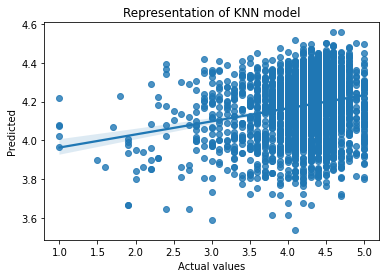

In [67]:
sns.regplot(y_test, prediction4)
plt.title('Representation of KNN model')
plt.ylabel('Predicted')
plt.xlabel('Actual values')

We used four models to build a model to predict rating of an app. Mean square error is one of the important evalyation metrics used in Regression probems. 
WE removed the Genres_dummy because it did not reflect a positive change for our model having tried it before. 

**Problems We encountered**

1) When we looked at the r2_score of our models, it was very low which is yielding towards an underfitting model. In better an underfitted model, you should make it more complex, with less regularisation. We didnt really know how to deal with that.


2) In the random forest regression model. The r2_score of the training_data was 0.8 while that of the test data was 0.1. We did not know how best to tune the data to better the score.